In [1]:
# business question 5Q
# 1 - what months/days have the highest crime rate 
# 2 - what area have most (thieft, BURGLARY, MOTOR VEHICLE THEFT, ROBBERY)  THEFT and check if it domestic 
# 3 - dose area that have more NARCOTICS cases tend to have more OFFENSE INVOLVING CHILDREN 
# 4 - OFFENSE INVOLVING CHILDREN are most of it domestic ? 
# 5 - CRIMINAL DAMAGE rate TO VEHICLE and proprety  
# 6 - what month the looting increased 


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
pd.set_option('display.max_columns', None)

%matplotlib inline

```python
def get_data(order = "date_of_occurrence"):
    '''
    get data from Socrata API using sodapy libary 
    
    argu:
    
    order : specifies the order of results default by date_of_occurrence
    '''
    from sodapy import Socrata
    # Unauthenticated client only works with public data sets. Note 'None'
    # in place of application token, and no username or password:
    client = Socrata("data.cityofchicago.org", None)
    
    columns = '''
    case_, date_of_occurrence, 
    block, _iucr, _primary_decsription,
    _secondary_description, _location_description, 
    arrest, domestic,
    latitude, longitude
    '''
    try:
        # dictionaries by sodapy.
        results = client.get("x2n5-8w5q", select = columns,  order = order,  limit=200809)

        # Convert to pandas DataFrame
        return pd.DataFrame.from_records(results)
    
    except Exception as e:
        print(e)
   ```

```
df = get_data()
```

###### saving the data to avoid strict throttling limits.
```python
df.to_csv("some.csv")
```

In [3]:
df = pd.read_csv("crime_data.csv")

In [4]:
df.head()

,Unnamed: 0,case_,date_of_occurrence,block,_iucr,_primary_decsription,_secondary_description,_location_description,arrest,domestic,latitude,longitude
0,0,JD218799,2020-04-23T05:07:00.000,023XX S STEWART AVE,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),N,N,41.850602,-87.635898
1,1,JD215083,2020-04-23T05:30:00.000,031XX N DAVLIN CT,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,N,Y,41.937743,-87.723740
2,2,JD215085,2020-04-23T05:33:00.000,104XX S WABASH AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,N,N,41.704390,-87.622258
3,3,JD215082,2020-04-23T05:42:00.000,082XX S SOUTH SHORE DR,0820,THEFT,$500 AND UNDER,APARTMENT,N,Y,41.745957,-87.547932
4,4,JD215137,2020-04-23T05:45:00.000,004XX W 104TH ST,1020,ARSON,BY FIRE,RESIDENCE,N,N,41.705200,-87.634832


In [5]:
df.shape

(200809, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200809 entries, 0 to 200808
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              200809 non-null  int64  
 1   case_                   200809 non-null  object 
 2   date_of_occurrence      200809 non-null  object 
 3   block                   200809 non-null  object 
 4   _iucr                   200809 non-null  object 
 5   _primary_decsription    200809 non-null  object 
 6   _secondary_description  200809 non-null  object 
 7   _location_description   199727 non-null  object 
 8   arrest                  200809 non-null  object 
 9   domestic                200809 non-null  object 
 10  latitude                198688 non-null  float64
 11  longitude               198688 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 18.4+ MB


In [7]:
# columns to fixing 

# Unmaed  no need for it 
df.drop("Unnamed: 0", axis=1, inplace=True)


df.date_of_occurrence = pd.to_datetime(df.date_of_occurrence)



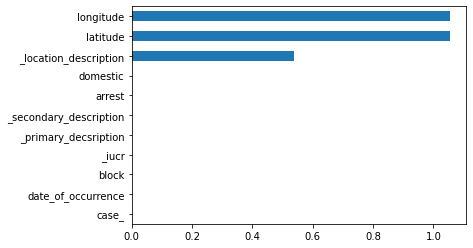

In [8]:
df.isnull().mean().mul(100).sort_values(ascending  = True).plot(kind ="barh");

In [9]:
df["year"] = df.date_of_occurrence.dt.year
df["month_name"] = df.date_of_occurrence.dt.month_name()
df["day_name"] = df.date_of_occurrence.dt.day_name()
df["time"] = df.date_of_occurrence.dt.time

In [10]:
df.head()

,case_,date_of_occurrence,block,_iucr,_primary_decsription,_secondary_description,_location_description,arrest,domestic,latitude,longitude,year,month_name,day_name,time
0,JD218799,2020-04-23 05:07:00,023XX S STEWART AVE,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),N,N,41.850602,-87.635898,2020,April,Thursday,05:07:00
1,JD215083,2020-04-23 05:30:00,031XX N DAVLIN CT,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,N,Y,41.937743,-87.723740,2020,April,Thursday,05:30:00
2,JD215085,2020-04-23 05:33:00,104XX S WABASH AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,N,N,41.704390,-87.622258,2020,April,Thursday,05:33:00
3,JD215082,2020-04-23 05:42:00,082XX S SOUTH SHORE DR,0820,THEFT,$500 AND UNDER,APARTMENT,N,Y,41.745957,-87.547932,2020,April,Thursday,05:42:00
4,JD215137,2020-04-23 05:45:00,004XX W 104TH ST,1020,ARSON,BY FIRE,RESIDENCE,N,N,41.705200,-87.634832,2020,April,Thursday,05:45:00


In [46]:
pd.crosstab(df._primary_decsription, df.day_name).sum().sort_values(ascending = False)

day_name
Sunday       29840
Friday       29394
Saturday     28894
Monday       28873
Wednesday    28070
Thursday     27982
Tuesday      27756
dtype: int64

In [71]:
pd.crosstab(df._primary_decsription, df.day_name)

day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
_primary_decsription,,,,,,,
ARSON,51,82,104,112,89,97,85
ASSAULT,2567,2532,2686,2617,2625,2517,2649
BATTERY,5582,5395,6460,6674,5106,5012,5117
BURGLARY,1062,1416,1148,1448,956,949,950
CONCEALED CARRY LICENSE VIOLATION,24,22,24,26,21,18,19
CRIMINAL DAMAGE,3507,3499,3732,4090,3210,3232,3260
CRIMINAL SEXUAL ASSAULT,177,148,193,177,130,127,167
CRIMINAL TRESPASS,498,472,492,479,482,509,492
DECEPTIVE PRACTICE,2859,3043,1690,2077,2967,3050,2987


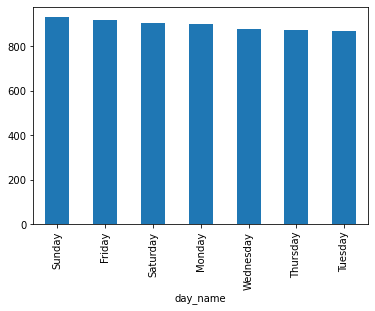

In [40]:
# 1 - what months/days have the highest crime rate 
pd.crosstab(df._primary_decsription, df.day_name).mean().sort_values(ascending = False).plot(kind = "bar");

look like sunday, friday, saturday  have more crime than others lets check what crime was the top 


In [58]:
pd.crosstab(df._primary_decsription, df.day_name)

day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
_primary_decsription,,,,,,,
ARSON,51,82,104,112,89,97,85
ASSAULT,2567,2532,2686,2617,2625,2517,2649
BATTERY,5582,5395,6460,6674,5106,5012,5117
BURGLARY,1062,1416,1148,1448,956,949,950
CONCEALED CARRY LICENSE VIOLATION,24,22,24,26,21,18,19
CRIMINAL DAMAGE,3507,3499,3732,4090,3210,3232,3260
CRIMINAL SEXUAL ASSAULT,177,148,193,177,130,127,167
CRIMINAL TRESPASS,498,472,492,479,482,509,492
DECEPTIVE PRACTICE,2859,3043,1690,2077,2967,3050,2987


In [86]:
df.query("day_name == 'Sunday'")["_primary_decsription"].value_counts(normalize = True)

BATTERY                              0.223660
THEFT                                0.151676
CRIMINAL DAMAGE                      0.137064
ASSAULT                              0.087701
DECEPTIVE PRACTICE                   0.069605
OTHER OFFENSE                        0.053318
WEAPONS VIOLATION                    0.052782
MOTOR VEHICLE THEFT                  0.051441
BURGLARY                             0.048525
ROBBERY                              0.037165
NARCOTICS                            0.024765
CRIMINAL TRESPASS                    0.016052
PUBLIC PEACE VIOLATION               0.013639
OFFENSE INVOLVING CHILDREN           0.007406
CRIMINAL SEXUAL ASSAULT              0.005932
HOMICIDE                             0.005697
SEX OFFENSE                          0.003887
ARSON                                0.003753
INTERFERENCE WITH PUBLIC OFFICER     0.001810
STALKING                             0.000905
CONCEALED CARRY LICENSE VIOLATION    0.000871
PROSTITUTION                      

In [88]:
df.query("_primary_decsription == 'BATTERY'")["_secondary_description"].value_counts(normalize = True)

DOMESTIC BATTERY SIMPLE                                         0.506633
SIMPLE                                                          0.258019
AGGRAVATED - HANDGUN                                            0.064937
AGGRAVATED - OTHER DANGEROUS WEAPON                             0.044198
AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS WEAPON            0.029812
AGGRAVATED - KNIFE / CUTTING INSTRUMENT                         0.019570
AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING INSTRUMENT        0.017333
AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY      0.017257
AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY         0.013140
PROTECTED EMPLOYEE - HANDS, FISTS, FEET, NO / MINOR INJURY      0.006710
AGGRAVATED OF A SENIOR CITIZEN                                  0.006379
AGGRAVATED - HANDS, FISTS, FEET, NO / MINOR INJURY              0.003533
AGGRAVATED POLICE OFFICER - OTHER DANGEROUS WEAPON              0.002669
AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY    